Randomized Optimization:

Part 1, npeaks




In [1]:
!pip install mlrose-hiive

     |████████████████████████████████| 51kB 3.7MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-cp37-none-any.whl size=98351 sha256=ba45fab90c64b4526347df92d7d0c9040a660dd1c5686d589cbf43cced397576
  Stored in directory: /root/.cache/pip/wheels/7c/42/31/77944bb5cb941be07e4a96e0c112ae32c8d27017c5f31459de
Successfully built mlrose-hiive


In [3]:

import mlrose_hiive as ml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SEED = 5


the fitness curve is the fitness score, and the number of fitness evals run


Tuning Hyperparameters rhc, testing 


max_attempts 10, 15, 20

In [4]:
fitness_curve_df = pd.DataFrame()
i = 10
while i < 31:
  PROBLEM_SIZE = 40
  problem = ml.ContinuousPeaksGenerator.generate(SEED,PROBLEM_SIZE,.2)
  schedule = ml.ExpDecay()
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.random_hill_climb(problem,max_attempts=i,max_iters=300,restarts=15,init_state=init_state,curve=True,random_state=5)
  
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "max_iters"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+5

CPU times: user 16.1 ms, sys: 2 µs, total: 16.1 ms
Wall time: 16.1 ms
CPU times: user 44.2 ms, sys: 7.19 ms, total: 51.4 ms
Wall time: 44 ms
CPU times: user 71.2 ms, sys: 8.04 ms, total: 79.2 ms
Wall time: 66.6 ms
CPU times: user 50.7 ms, sys: 822 µs, total: 51.5 ms
Wall time: 51.5 ms
CPU times: user 109 ms, sys: 9.71 ms, total: 119 ms
Wall time: 99 ms


    Score10  max_iters10
0       4.0        164.0
1       4.0        165.0
2       4.0        166.0
3       4.0        167.0
4       4.0        168.0
5       6.0        170.0
6       6.0        171.0
7      11.0        173.0
8      11.0        174.0
9      11.0        175.0
10     11.0        176.0
11     11.0        177.0
12     11.0        178.0
13     11.0        179.0
14     11.0        180.0
15     11.0        181.0
16     11.0        182.0
17     13.0        184.0
18     13.0        185.0
19     13.0        186.0
20     13.0        187.0
21     13.0        188.0
22     13.0        189.0
23     13.0        190.0
24     13.0        191.0
25     13.0        192.0
26     13.0        193.0
27     13.0        194.0
    Score15  max_iters15
0       4.0         70.0
1       4.0         71.0
2       5.0         73.0
3       5.0         74.0
4       5.0         75.0
..      ...          ...
71     54.0        151.0
72     54.0        152.0
73     54.0        153.0
74     54.0        154.0


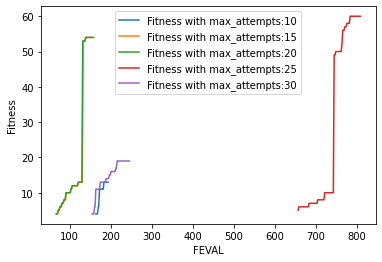

In [ ]:
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with max_attempts:'+str(10+(i*5)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()

In [5]:
fitness_curve_df = pd.DataFrame()
i = 20
while i < 101:
  PROBLEM_SIZE = i
  problem = ml.ContinuousPeaksGenerator.generate(SEED,PROBLEM_SIZE,.2)
  schedule = ml.ExpDecay()
  np.random.seed(SEED)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.random_hill_climb(problem,max_attempts=25,max_iters=300,restarts=15,init_state=init_state,curve=True,random_state=5)
  
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+20

CPU times: user 36.7 ms, sys: 859 µs, total: 37.5 ms
Wall time: 38 ms
CPU times: user 50.4 ms, sys: 0 ns, total: 50.4 ms
Wall time: 50.4 ms
CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 36 ms
CPU times: user 53.5 ms, sys: 0 ns, total: 53.5 ms
Wall time: 53.5 ms
CPU times: user 69.3 ms, sys: 0 ns, total: 69.3 ms
Wall time: 70 ms


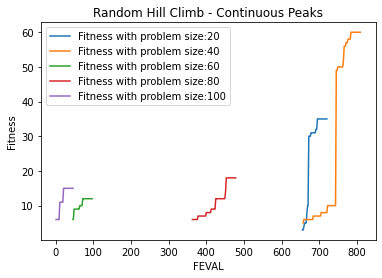

In [6]:


count = 20
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  #print(temp_df)
  
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with problem size:'+str(count))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
  count = count +20
  
plt.title('Random Hill Climb - Continuous Peaks')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()

In [ ]:
hp tuning, SA npeaks: schedules

In [ ]:
fitness_curve_df = pd.DataFrame()
i = 0
while i < 2:
  PROBLEM_SIZE = 40
  problem = ml.ContinuousPeaksGenerator.generate(SEED,PROBLEM_SIZE,.2)
  schedule = ml.GeomDecay()
  if i == 0:
    schedule = ml.ExpDecay()
  %time best_state, best_fitness, fitness_curve = ml.simulated_annealing(problem,schedule=schedule,max_attempts=15,max_iters=1000,init_state=init_state,curve=True,random_state=5,fevals=True)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+1

CPU times: user 87.9 ms, sys: 17.9 ms, total: 106 ms
Wall time: 87.5 ms
CPU times: user 81.9 ms, sys: 10.4 ms, total: 92.4 ms
Wall time: 74.3 ms


     Score0  Fevals0
0       4.0      3.0
1       4.0      5.0
2       4.0      7.0
3       4.0      9.0
4       4.0     11.0
..      ...      ...
579    66.0    872.0
580    66.0    873.0
581    66.0    874.0
582    66.0    875.0
583    66.0    876.0

[584 rows x 2 columns]
     Score1  Fevals1
0       4.0      3.0
1       4.0      5.0
2       4.0      7.0
3       4.0      9.0
4       4.0     11.0
..      ...      ...
522    32.0    766.0
523    32.0    767.0
524    32.0    768.0
525    32.0    769.0
526    32.0    770.0

[527 rows x 2 columns]


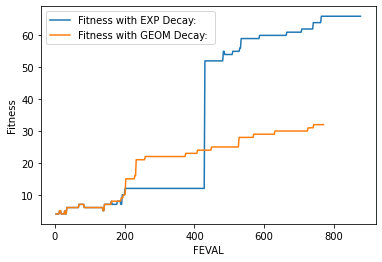

In [ ]:
for i in range(2):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  if i==0:
    plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with EXP Decay: ')
  else:
    plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with GEOM Decay: ')
  #plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with EXP Decay: ' + str((i*10)+30))
  
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()

In [7]:
import matplotlib.pyplot as plt
fitness_curve_df = pd.DataFrame()
i = 20
while i < 101:
  PROBLEM_SIZE = i
  problem = ml.ContinuousPeaksGenerator.generate(SEED,PROBLEM_SIZE,.2)
  schedule = ml.ExpDecay()
  np.random.seed(SEED)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.simulated_annealing(problem,schedule=schedule,max_attempts=15,max_iters=1000,init_state=init_state,curve=True,random_state=5,fevals=True)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+20
  

CPU times: user 10.9 ms, sys: 1.19 ms, total: 12.1 ms
Wall time: 10.6 ms
CPU times: user 79.9 ms, sys: 9.49 ms, total: 89.4 ms
Wall time: 79 ms
CPU times: user 93 ms, sys: 6.45 ms, total: 99.4 ms
Wall time: 86.9 ms
CPU times: user 176 ms, sys: 9.83 ms, total: 186 ms
Wall time: 166 ms
CPU times: user 193 ms, sys: 18.5 ms, total: 211 ms
Wall time: 192 ms


     Score20  Fevals20
0        4.0       3.0
1        4.0       5.0
2        3.0       7.0
3        3.0       9.0
4        3.0      11.0
..       ...       ...
104     16.0     172.0
105     16.0     173.0
106     16.0     174.0
107     16.0     175.0
108     16.0     176.0

[109 rows x 2 columns]
     Score40  Fevals40
0        4.0       3.0
1        4.0       5.0
2        4.0       7.0
3        4.0       9.0
4        4.0      11.0
..       ...       ...
579     66.0     872.0
580     66.0     873.0
581     66.0     874.0
582     66.0     875.0
583     66.0     876.0

[584 rows x 2 columns]
     Score60  Fevals60
0        6.0       3.0
1        6.0       5.0
2        6.0       7.0
3        6.0       9.0
4        6.0      10.0
..       ...       ...
590     51.0     926.0
591     51.0     927.0
592     51.0     928.0
593     51.0     929.0
594     51.0     930.0

[595 rows x 2 columns]
     Score80  Fevals80
0        6.0       3.0
1        6.0       5.0
2        6.0       7.0
3       

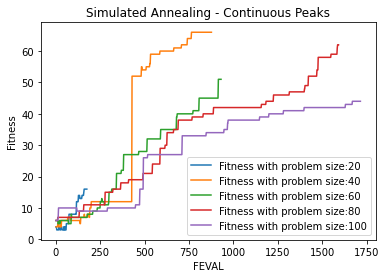

In [8]:
count = 20
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with problem size:'+str(count))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
  count = count +20
plt.title('Simulated Annealing - Continuous Peaks')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()


GA HP Tuning, pop size 100-500, by 100s. 400 sweet spot between hitting max score and number of fevals to get there.

In [ ]:
fitness_curve_df = pd.DataFrame()
i = 100
while i < 501:
  PROBLEM_SIZE = 40
  problem = ml.ContinuousPeaksGenerator.generate(SEED,PROBLEM_SIZE,.2)
  schedule = ml.ExpDecay()
  np.random.seed(SEED)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.genetic_alg(problem,pop_size=i,max_attempts=10,curve=True,random_state=5)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+100

CPU times: user 364 ms, sys: 0 ns, total: 364 ms
Wall time: 364 ms
CPU times: user 894 ms, sys: 0 ns, total: 894 ms
Wall time: 897 ms
CPU times: user 1.65 s, sys: 0 ns, total: 1.65 s
Wall time: 1.66 s
CPU times: user 1.19 s, sys: 0 ns, total: 1.19 s
Wall time: 1.2 s
CPU times: user 1.6 s, sys: 0 ns, total: 1.6 s
Wall time: 1.58 s


    Score100  Fevals100
0       11.0      202.0
1       15.0      304.0
2       15.0      405.0
3       50.0      507.0
4       50.0      608.0
5       50.0      709.0
6       52.0      811.0
7       52.0      912.0
8       55.0     1014.0
9       59.0     1116.0
10      59.0     1217.0
11      59.0     1318.0
12      59.0     1419.0
13      62.0     1521.0
14      62.0     1622.0
15      62.0     1723.0
16      62.0     1824.0
17      64.0     1926.0
18      64.0     2027.0
19      64.0     2128.0
20      67.0     2230.0
21      67.0     2331.0
22      67.0     2432.0
23      67.0     2533.0
24      67.0     2634.0
25      67.0     2735.0
26      67.0     2836.0
27      67.0     2937.0
28      67.0     3038.0
29      67.0     3139.0
30      67.0     3240.0
    Score200  Fevals200
0       15.0      402.0
1       16.0      604.0
2       50.0      806.0
3       50.0     1007.0
4       55.0     1209.0
5       55.0     1410.0
6       55.0     1611.0
7       55.0     1812.0
8       55.0    

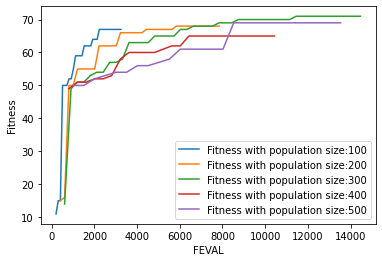

In [ ]:

for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with population size:'+str(100+(i*100)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
  count = count *2
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()

In [9]:
fitness_curve_df = pd.DataFrame()
i = 20
while i < 101:
  PROBLEM_SIZE = i
  problem = ml.ContinuousPeaksGenerator.generate(SEED,PROBLEM_SIZE,.2)
  schedule = ml.ExpDecay()
  np.random.seed(SEED)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.genetic_alg(problem,pop_size=300,max_attempts=10,curve=True,random_state=5)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+20

CPU times: user 643 ms, sys: 432 µs, total: 643 ms
Wall time: 644 ms
CPU times: user 1.36 s, sys: 1.7 ms, total: 1.36 s
Wall time: 1.36 s
CPU times: user 2.47 s, sys: 1.05 ms, total: 2.47 s
Wall time: 2.46 s
CPU times: user 2.59 s, sys: 5.31 ms, total: 2.6 s
Wall time: 2.6 s
CPU times: user 1.57 s, sys: 0 ns, total: 1.57 s
Wall time: 1.58 s


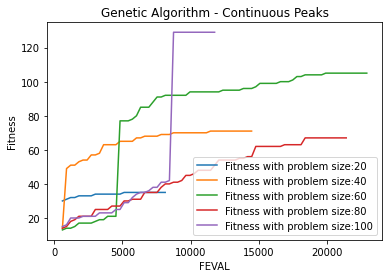

In [10]:
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  #print(temp_df)
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with problem size:'+str(20+(i*20)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.title("Genetic Algorithm - Continuous Peaks")
plt.legend()

HP TUning MIMIC, npeaks
: 

In [ ]:
fitness_curve_df = pd.DataFrame()
i = 1
while i < 6:
  PROBLEM_SIZE = 40
  problem = ml.ContinuousPeaksGenerator.generate(SEED,PROBLEM_SIZE,.2)
  schedule = ml.ExpDecay()
  np.random.seed(SEED)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.mimic(problem,pop_size=200,keep_pct=i/10,max_attempts=15,curve=True,random_state=5)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+1

CPU times: user 13 s, sys: 0 ns, total: 13 s
Wall time: 13 s
CPU times: user 15.7 s, sys: 5.63 ms, total: 15.7 s
Wall time: 15.8 s
CPU times: user 21.3 s, sys: 7.47 ms, total: 21.3 s
Wall time: 21.4 s
CPU times: user 24.6 s, sys: 12.7 ms, total: 24.6 s
Wall time: 24.7 s
CPU times: user 23.2 s, sys: 9.03 ms, total: 23.2 s
Wall time: 23.2 s


    Score1  Fevals1
0     50.0    402.0
1     50.0    603.0
2     50.0    804.0
3     50.0   1005.0
4     50.0   1206.0
5     50.0   1407.0
6     50.0   1608.0
7     50.0   1809.0
8     50.0   2010.0
9     50.0   2211.0
10    50.0   2412.0
11    50.0   2613.0
12    50.0   2814.0
13    50.0   3015.0
14    50.0   3216.0
15    50.0   3417.0
    Score2  Fevals2
0     14.0    402.0
1     17.0    604.0
2     55.0    806.0
3     60.0   1008.0
4     60.0   1209.0
5     60.0   1410.0
6     60.0   1611.0
7     60.0   1812.0
8     60.0   2013.0
9     60.0   2214.0
10    60.0   2415.0
11    60.0   2616.0
12    60.0   2817.0
13    60.0   3018.0
14    60.0   3219.0
15    60.0   3420.0
16    60.0   3621.0
17    60.0   3822.0
18    60.0   4023.0
    Score3  Fevals3
0     11.0    402.0
1     51.0    604.0
2     52.0    806.0
3     54.0   1008.0
4     55.0   1210.0
5     58.0   1412.0
6     58.0   1613.0
7     61.0   1815.0
8     61.0   2016.0
9     61.0   2217.0
10    62.0   2419.0
11    62.0   2620.0


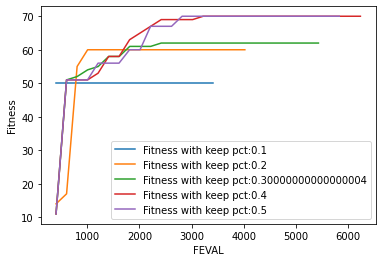

In [ ]:
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with keep pct:'+str(.1+(i/10)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()

In [11]:
fitness_curve_df = pd.DataFrame()
i = 20
while i < 101:
  PROBLEM_SIZE = i
  problem = ml.ContinuousPeaksGenerator.generate(SEED,PROBLEM_SIZE,.2)
  schedule = ml.ExpDecay()
  np.random.seed(SEED)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.mimic(problem,pop_size=200,keep_pct=0.5,max_attempts=15,curve=True,random_state=5)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+20

CPU times: user 3.87 s, sys: 1.79 ms, total: 3.87 s
Wall time: 3.91 s
CPU times: user 21 s, sys: 931 µs, total: 21 s
Wall time: 21 s
CPU times: user 51.3 s, sys: 14.1 ms, total: 51.3 s
Wall time: 51.4 s
CPU times: user 1min 52s, sys: 20.5 ms, total: 1min 52s
Wall time: 1min 52s
CPU times: user 2min 41s, sys: 26.7 ms, total: 2min 41s
Wall time: 2min 42s


    Score20  Fevals20
0      29.0     402.0
1      32.0     604.0
2      32.0     805.0
3      32.0    1006.0
4      35.0    1208.0
5      35.0    1409.0
6      35.0    1610.0
7      35.0    1811.0
8      35.0    2012.0
9      35.0    2213.0
10     35.0    2414.0
11     35.0    2615.0
12     35.0    2816.0
13     35.0    3017.0
14     35.0    3218.0
15     35.0    3419.0
16     35.0    3620.0
17     35.0    3821.0
18     35.0    4022.0
19     35.0    4223.0
    Score40  Fevals40
0      11.0     402.0
1      51.0     604.0
2      51.0     805.0
3      51.0    1006.0
4      56.0    1208.0
5      56.0    1409.0
6      56.0    1610.0
7      60.0    1812.0
8      60.0    2013.0
9      67.0    2215.0
10     67.0    2416.0
11     67.0    2617.0
12     70.0    2819.0
13     70.0    3020.0
14     70.0    3221.0
15     70.0    3422.0
16     70.0    3623.0
17     70.0    3824.0
18     70.0    4025.0
19     70.0    4226.0
20     70.0    4427.0
21     70.0    4628.0
22     70.0    4829.0
23     70.

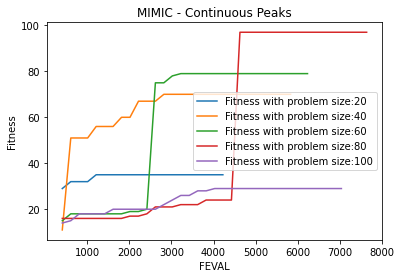

In [12]:
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with problem size:'+str(20+(i*20)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.title("MIMIC - Continuous Peaks")
plt.legend()